In [5]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']= (12,8) # Adjusts the configuration of the plots we will create


# Read in the data

df = pd.read_csv(r'C:\Users\Warbucks\Desktop\Data Analyst\DA_CAREER_BUILDER\PROJECTS\movies.csv')

In [50]:
# Let's look at the data

df.head()

name  rating  genre  year  released  score    votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000      1795    2832   
1  3929       6      1  1980      1127    5.8    65000      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000       757    1818   
3   204       4      4  1980      1127    7.7   221000       889    1413   
4   732       6      4  1980      1170    7.3   108000       719     351   

   star  country    budget      gross  company  runtime  yearcorrect  
0   699       46  19000000   46998772     1426    146.0           11  
1   214       47   4500000   58853106      452    104.0           10  
2  1157       47  18000000  538375067      945    124.0           11  
3  1474       47   3500000   83453539     1108     88.0           10  
4   271       47   6000000   39846344     1083     98.0           10

In [6]:
# Let's see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [7]:
df = df.dropna()

df['yearcorrect'] = df['released'].strextract(pat = '([0-9]{4})').astype(int)

AttributeError: 'Series' object has no attribute 'strextract'

In [8]:
# Missing data. There are many ways to handle missing values but for the sake of time, I decided to drop all rows that have missing data. I have 71% of data remaining.
df = df.dropna()

# Extracting the year is different as the formatting is different. Running the following should extract the correct year.

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

# Duplicates, there aren't any in this dataset so I should be fine on that.

In [9]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
yearcorrect - 0.0%


In [10]:
# Data types for our colulms
df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget         float64
gross          float64
company         object
runtime        float64
yearcorrect      int32
dtype: object

In [11]:
# Change data type for columns that have 1 decimal point to make it more appealing

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df['votes'] = df['votes'].astype('int64')

In [49]:
df.head()

name  rating  genre  year  released  score    votes  director  writer  \
0  4692       6      6  1980      1304    8.4   927000      1795    2832   
1  3929       6      1  1980      1127    5.8    65000      1578    1158   
2  3641       4      0  1980      1359    8.7  1200000       757    1818   
3   204       4      4  1980      1127    7.7   221000       889    1413   
4   732       6      4  1980      1170    7.3   108000       719     351   

   star  country    budget      gross  company  runtime  yearcorrect  
0   699       46  19000000   46998772     1426    146.0           11  
1   214       47   4500000   58853106      452    104.0           10  
2  1157       47  18000000  538375067      945    124.0           11  
3  1474       47   3500000   83453539     1108     88.0           10  
4   271       47   6000000   39846344     1083     98.0           10

In [13]:
# Create correct year column
df['yearcorrect'] = df['released'].astype(str).str[:4]

In [14]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
5640                                 Tanner Hall          R   Drama  2009   
2434                  Philadelphia Experiment II      PG-13  Action  1993   
3681                                Ginger Snaps  Not Rated   Drama  2000   
272                                     Parasite          R  Horror  1982   
3203                                  Trojan War      PG-13  Comedy  1997   

                               released  score    votes             director  \
5445  December 18, 2009 (United States)    7.8  1100000        James Cameron   
7445     April 26, 2019 (United States)    8.4   903000        Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000        James Cameron   
6663  December 18, 2015 (United States)    7.8   876000          J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000        Anthony Russo   
...                                 ...    ...      ...                  ...   
5640          January 15, 2015 (Sweden)    5.8     3500  Francesca Gregorini   
2434         June 4, 1994 (South Korea)    4.5     1900     Stephen Cornwell   
3681              May 11, 2001 (Canada)    6.8    43000         John Fawcett   
272      March 12, 1982 (United States)    3.9     2300         Charles Band   
3203           October 1, 1997 (Brazil)    5.7     5800         George Huang   

                       writer               star        country     budget  \
5445            James Cameron    Sam Worthington  United States  237000000   
7445       Christopher Markus  Robert Downey Jr.  United States  356000000   
3045            James Cameron  Leonardo DiCaprio  United States  200000000   
6663          Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244       Christopher Markus  Robert Downey Jr.  United States  321000000   
...                       ...                ...            ...        ...   
5640  Tatiana von Fürstenberg        Rooney Mara  United States    3000000   
2434       Wallace C. Bennett       Brad Johnson  United States    5000000   
3681             Karen Walton      Emily Perkins         Canada    5000000   
272             Alan J. Adler    Robert Glaudini  United States     800000   
3203                Andy Burg       Will Friedle  United States   15000000   

           gross                    company  runtime yearcorrect  
5445  2847246203      Twentieth Century Fox    162.0        Dece  
7445  2797501328             Marvel Studios    181.0        Apri  
3045  2201647264      Twentieth Century Fox    194.0        Dece  
6663  2069521700                  Lucasfilm    138.0        Dece  
7244  2048359754             Marvel Studios    149.0        Apri  
...          ...                        ...      ...         ...  
5640        5073           Two Prong Lesson     96.0        Janu  
2434        2970           Trimark Pictures     97.0        June  
3681        2554  Copperheart Entertainment    108.0        May   
272         2270           Embassy Pictures     85.0        Marc  
3203         309                   Daybreak     85.0        Octo  

[5421 rows x 16 columns]

In [16]:
# Command gets rid of ... in data and allows you to scroll through it 

pd.set_option('display.max_rows', None)

In [18]:
# Drop any duplicates for safety measure

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [19]:
# Budget high correlation
# Company high correlation


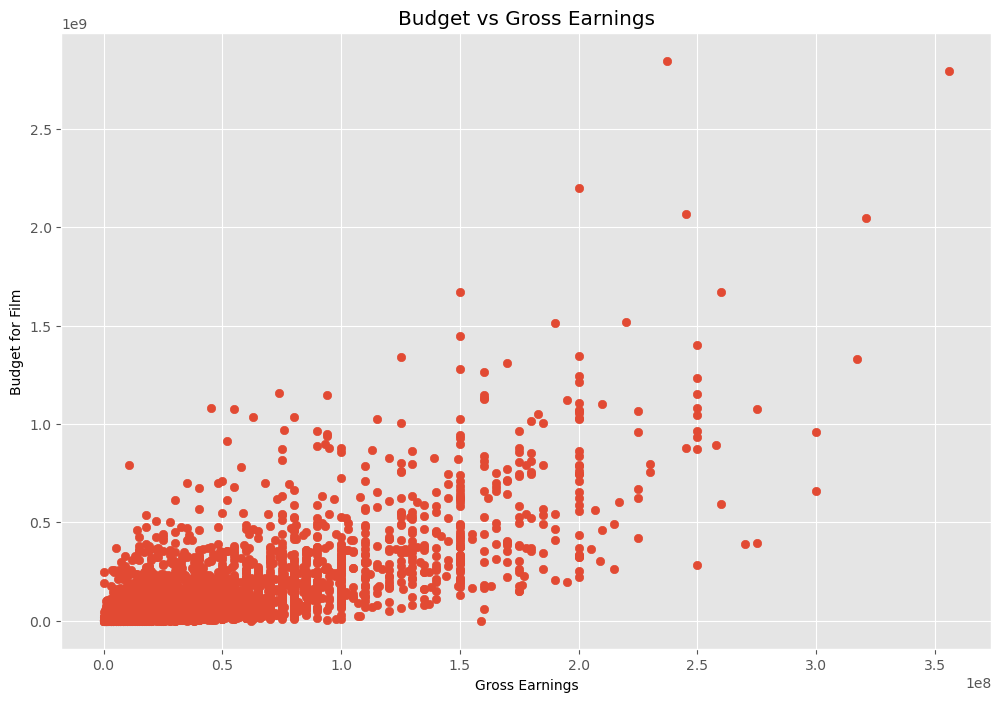

In [22]:
# Scatter plot with budget vs gross revenue

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

In [21]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        June  
1   58853106   Columbia Pictures    104.0        July  
2  538375067           Lucasfilm    124.0        June  
3   83453539  Paramount Pictures     88.0        July  
4   39846344      Orion Pictures     98.0        July

<Axes: xlabel='budget', ylabel='gross'>

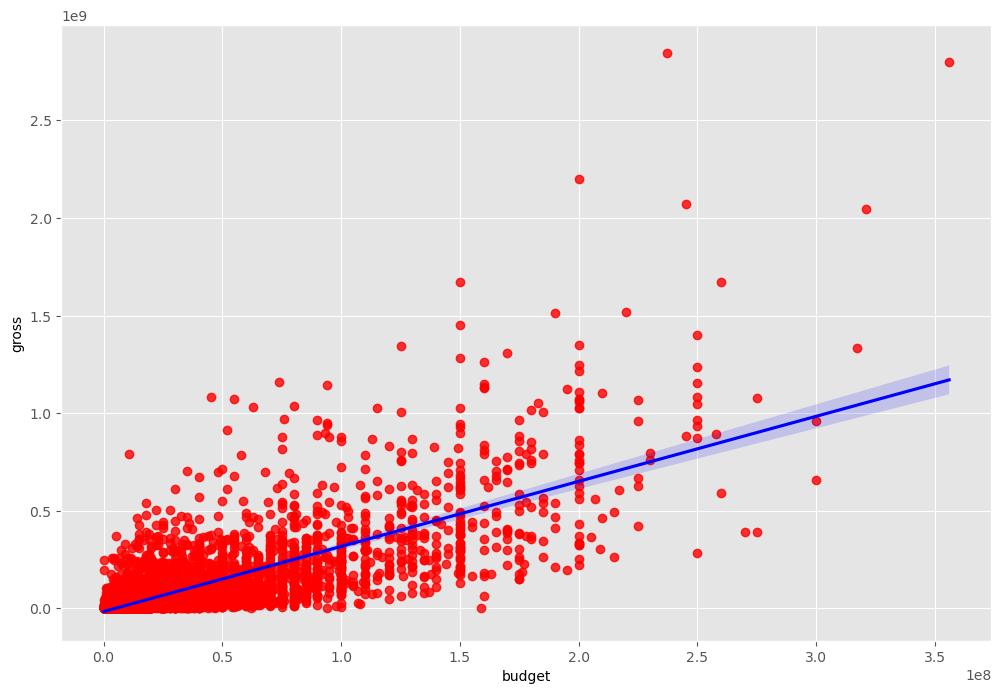

In [31]:
# Plot the budget vs gross using seaborn and change color to visualize better

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [33]:
# Let's start looking at correlation



In [35]:
df.corr(method='pearson') #pearson, kendall, spearman

C:\Users\Warbucks\AppData\Local\Temp\ipykernel_23472\4211989294.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson') #pearson, kendall, spearman


year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

In [36]:
# High correlation between budget and gross at .74

C:\Users\Warbucks\AppData\Local\Temp\ipykernel_23472\2708932002.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


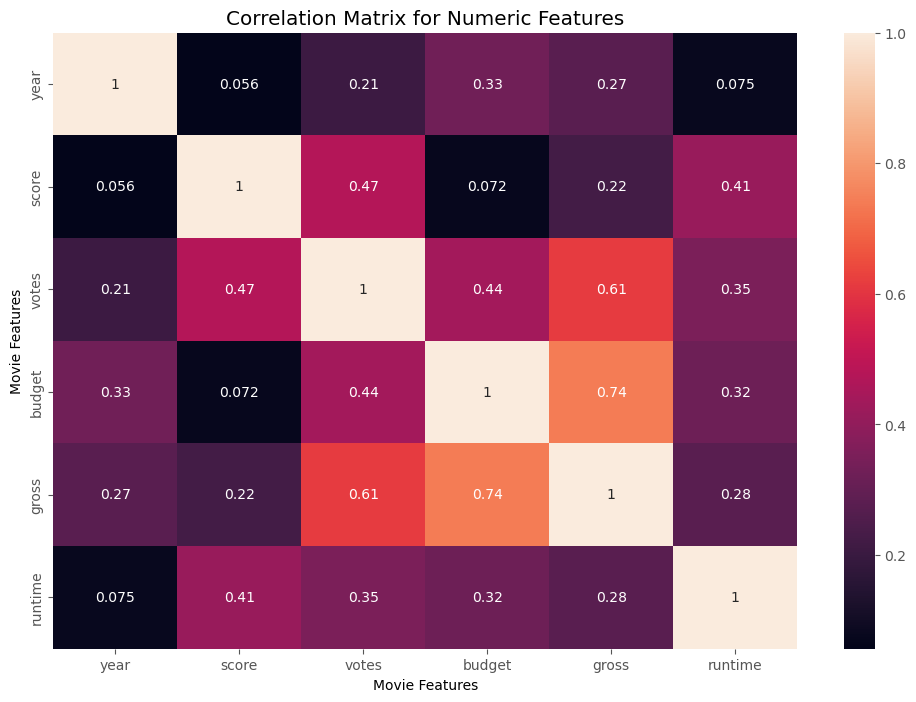

In [38]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [39]:
# Looks at Company

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        June  
1   58853106   Columbia Pictures    104.0        July  
2  538375067           Lucasfilm    124.0        June  
3   83453539  Paramount Pictures     88.0        July  
4   39846344      Orion Pictures     98.0        July

In [40]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

name  rating  genre  year  released  score    votes  director  writer  \
0     4692       6      6  1980      1304    8.4   927000      1795    2832   
1     3929       6      1  1980      1127    5.8    65000      1578    1158   
2     3641       4      0  1980      1359    8.7  1200000       757    1818   
3      204       4      4  1980      1127    7.7   221000       889    1413   
4      732       6      4  1980      1170    7.3   108000       719     351   
5     1509       6      9  1980      1922    6.4   123000      1758    3081   
6     3930       6      0  1980      1359    7.9   188000       974     576   
7     3122       6      3  1980       530    8.2   330000      1269    1257   
8     3732       4      0  1980      1346    6.8   101000      1606    1402   
9     4401       6      3  1980      1755    7.0    10000      2011     280   
10     332       4      0  1980       510    6.1    18000       236    2810   
11    4179       4      1  1980      2272    7.3    54000       817    1300   
12    3029       4      1  1980       471    5.3    30000      1643    1658   
13    2859       6      6  1980      2416    7.7    49000      1666    1653   
14    1208       6      5  1980      1170    7.1    37000       207     350   
15    3553       4      6  1980      2294    7.2    27000       847    2507   
17      66       4      4  1980       530    6.9    29000       333    2315   
18    4143       6      9  1980       832    6.8    66000       943    1486   
20     986       6      5  1980       714    6.5    20000      2032    3151   
21    1762       6      1  1980       117    6.8    14000      1307    2065   
22    4128       4      0  1980       213    6.7    22000       502    2959   
23    5289       4      8  1980       437    5.3    12000      1654    2492   
28     700       6      5  1980      1359    7.2    17000      1870    3099   
29     261       6      5  1980       667    6.2    22000      1489    2358   
33     785       4      6  1980       117    6.1      604      1146     673   
35    3068       6      4  1980      2156    6.2    24000       744    2207   
36    4245       6      4  1980      1883    6.3     4300       581     966   
37    2618       6      4  1980      2257    6.0    11000      1116    2578   
42    4736       6      0  1980      1413    7.1     9000      1613    1802   
46    4312       6      0  1980      1304    5.3     3900      1337    2383   
48    4512       4      0  1980      1922    5.1     3100       329    2036   
50    3648       4      4  1980      2476    7.3    22000      2043    3184   
51    2497       6      4  1980      2416    6.8     4500      1025     303   
53     692       4      0  1980      1289    6.1    11000       327     768   
56    5193       4      0  1980      1629    4.6     2600       793    1078   
57    2818       4      4  1980      1051    5.4     2400       914    2623   
58    4519       6      0  1980       261    5.1     5200       551    1819   
75    4351       1      1  1980      1399    5.8     1300       267     939   
77    5240       6      4  1980       261    5.9      415      1484    1339   
80    2971       6      6  1980      2551    4.0      546       969    1014   
92    1973       4      0  1981      1296    8.4   905000      1859    1806   
94     284       6      4  1981       314    7.5    97000       974    1524   
95    1301       6      0  1981      1040    7.2   131000       943    1486   
96    4100       2      9  1981        46    7.5   192000      1735    2707   
97    3031       6      4  1981      1568    6.2    40000       177     307   
98     603       6      5  1981      1162    7.4    47000       207     350   
99     861       4      0  1981      1296    6.9    42000       478     277   
100   1329       6      1  1981        11    7.4    59000       937    2963   
101   2389       6      0  1981      1805    7.6   170000       654    2941   
103   3699       6      4  1981      1406    6.9    6800

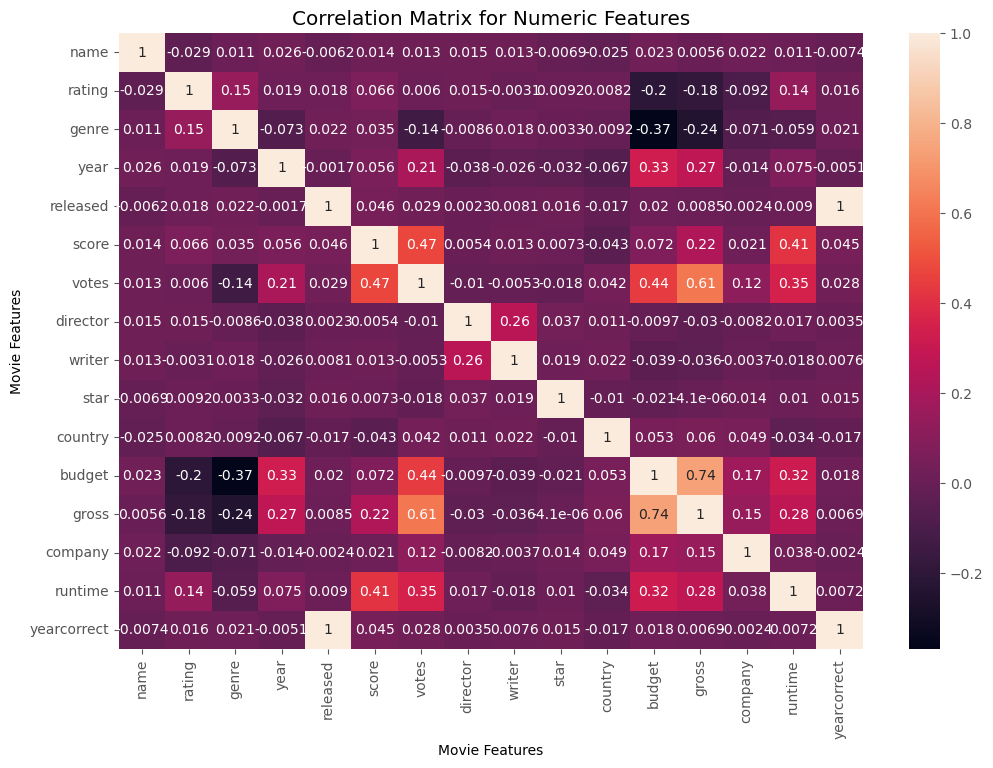

In [42]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [43]:
# Non visual correlation

df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.029234  0.010996  0.025542 -0.006152  0.014450   
rating      -0.029234  1.000000  0.147796  0.019499  0.018083  0.065983   
genre        0.010996  0.147796  1.000000 -0.073167  0.022142  0.035106   
year         0.025542  0.019499 -0.073167  1.000000 -0.001740  0.056386   
released    -0.006152  0.018083  0.022142 -0.001740  1.000000  0.045874   
score        0.014450  0.065983  0.035106  0.056386  0.045874  1.000000   
votes        0.012615  0.006031 -0.135990  0.206021  0.028833  0.474256   
director     0.015246  0.014656 -0.008553 -0.038354  0.002308  0.005413   
writer       0.012880 -0.003149  0.017578 -0.025908  0.008072  0.012843   
star        -0.006882  0.009196  0.003341 -0.032157  0.015706  0.007296   
country     -0.025490  0.008230 -0.009164 -0.066748 -0.017228 -0.043051   
budget       0.023392 -0.203946 -0.368523  0.327722  0.019952  0.072001   
gross        0.005639 -0.181906 -0.244101  0.274321  0.008501  0.222556   
company      0.021697 -0.092357 -0.071334 -0.014333 -0.002407  0.020656   
runtime      0.010850  0.140792 -0.059237  0.075077  0.008975  0.414068   
yearcorrect -0.007371  0.015532  0.021306 -0.005073  0.996181  0.045136   

                votes  director    writer      star   country    budget  \
name         0.012615  0.015246  0.012880 -0.006882 -0.025490  0.023392   
rating       0.006031  0.014656 -0.003149  0.009196  0.008230 -0.203946   
genre       -0.135990 -0.008553  0.017578  0.003341 -0.009164 -0.368523   
year         0.206021 -0.038354 -0.025908 -0.032157 -0.066748  0.327722   
released     0.028833  0.002308  0.008072  0.015706 -0.017228  0.019952   
score        0.474256  0.005413  0.012843  0.007296 -0.043051  0.072001   
votes        1.000000 -0.010376 -0.005316 -0.017638  0.041551  0.439675   
director    -0.010376  1.000000  0.261735  0.036593  0.011133 -0.009662   
writer      -0.005316  0.261735  1.000000  0.018520  0.022488 -0.039466   
star        -0.017638  0.036593  0.018520  1.000000 -0.009990 -0.021473   
country      0.041551  0.011133  0.022488 -0.009990  1.000000  0.052977   
budget       0.439675 -0.009662 -0.039466 -0.021473  0.052977  1.000000   
gross        0.614751 -0.029560 -0.035885 -0.000004  0.060078  0.740247   
company      0.118470 -0.008223 -0.003697  0.014082  0.048569  0.170235   
runtime      0.352303  0.017433 -0.017561  0.010108 -0.034477  0.318695   
yearcorrect  0.027535  0.003497  0.007594  0.014919 -0.016957  0.018328   

                gross   company   runtime  yearcorrect  
name         0.005639  0.021697  0.010850    -0.007371  
rating      -0.181906 -0.092357  0.140792     0.015532  
genre       -0.244101 -0.071334 -0.059237     0.021306  
year         0.274321 -0.014333  0.075077    -0.005073  
released     0.008501 -0.002407  0.008975     0.996181  
score        0.222556  0.020656  0.414068     0.045136  
votes        0.614751  0.118470  0.352303     0.027535  
director    -0.029560 -0.008223  0.017433     0.003497  
writer      -0.035885 -0.003697 -0.017561     0.007594  
star        -0.000004  0.014082  0.010108     0.014919  
country      0.060078  0.048569 -0.034477    -0.016957  
budget       0.740247  0.170235  0.318695     0.018328  
gross        1.000000  0.149553  0.275796     0.006873  
company      0.149553  1.000000  0.037585    -0.002361  
runtime      0.275796  0.037585  1.000000     0.007167  
yearcorrect  0.006873 -0.002361  0.007167     1.000000

In [44]:
# Correlation not within structure

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect   -0.007371
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [45]:
# Sorted correlation no visualization chart

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.368523
genre        budget        -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
rating       company       -0.092357
company      rating        -0.092357
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
country      year          -0.066748
year         country       -0.066748
runtime      genre         -0.059237
genre        runtime       -0.059237
country      score         -0.043051
score        country       -0.043051
budget       writer        -0.039466
writer       budget        -0.039466
director     year          -0.038354
year         director      -0.038354
gross        writer        -0.035885
w

In [46]:
# Sorted pairs with filter to find the values we need

high_corr = sorted_pairs[(sorted_pairs) > 0.5] 

high_corr

gross        votes          0.614751
votes        gross          0.614751
budget       gross          0.740247
gross        budget         0.740247
yearcorrect  released       0.996181
released     yearcorrect    0.996181
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [47]:
# Votes and budget have the highest correlation to gross earnings

In [ ]:
# Company has low correlation
# My educated guess was wrong